In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import neighbors,datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,r2_score,accuracy_score,f1_score,confusion_matrix,classification_report, mean_squared_error
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor

In [99]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_seq_items')
pd.set_option('display.float_format', '{:,.2f}'.format)

# IMPORT DATA

In [100]:
import pyodbc
import pandas as pd
server = '45.117.83.230,1433'  # Tên hoặc địa chỉ IP của máy chủ SQL
database = 'DA_FINALTEST'
username = 'Student_DA_Q1' # Tên đăng nhập
password = '@MindXDream2023'  # Mật khẩu
driver = '{ODBC Driver 17 for SQL Server}'  # Driver ODBC (phiên bản có thể thay đổi)

# Tạo kết nối
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(connection_string)

# Tạo cursor để thực thi truy vấn
cursor = conn.cursor()

# Thực thi truy vấn SQL
query = '''SELECT * FROM  [dbo].[CarPrice_Assignment]'''  # Thay đổi câu lệnh SQL phù hợp với nhu cầu của bạn
df = pd.read_sql(query,conn)
conn.close()
df

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\130070910.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,four,130,mpfi,347.00,268.00,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,four,130,mpfi,347.00,268.00,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,945.00,"1,712.00",655.00,524.00,2823,ohcv,six,152,mpfi,268.00,347.00,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,998.00,"1,766.00",662.00,543.00,2337,ohc,four,109,mpfi,319.00,34.00,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,994.00,"1,766.00",664.00,543.00,2824,ohc,five,136,mpfi,319.00,34.00,8.00,115,5500,18,22,"17,450.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,2952,ohc,four,141,mpfi,378.00,315.00,95.00,114,5400,23,28,"16,845.00"
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,"1,091.00","1,888.00",688.00,555.00,3049,ohc,four,141,mpfi,378.00,315.00,87.00,160,5300,19,25,"19,045.00"
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3012,ohcv,six,173,mpfi,358.00,287.00,88.00,134,5500,18,23,"21,485.00"
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3217,ohc,six,145,idi,301.00,34.00,23.00,106,4800,26,27,"22,470.00"


In [101]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# EDA

In [102]:
# Chuyển tên cột thành chữ viết thường
df.columns = df.columns.str.lower()

# Delete the columns not means to analyst
df.drop(columns=['car_id'], inplace= True)

# Check missing value
print(f'Số dòng bị null là {df.isnull().sum()}') # => Không có null 

##Check Duplicates
print(f'Số dòng bị lặp lại là {df.duplicated().sum()}') #=> Không có dòng lặp lại

# TRANSFORM Doornumber 'Object' to 'Int'
df.price = df.price.astype('int64')

# Transform column "Doornumber" to numberic (2,4) and column "cylindernumber" to numberic
df.doornumber = df.doornumber.map({'two':2,'four':4})
df.cylindernumber = df.cylindernumber.map({'two':2,'three':3,'four':4,
                                           'five':5,'six':6,'eight':8,'twelve':12})

Số dòng bị null là symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Số dòng bị lặp lại là 0


CHECK DESCRIBE

In [103]:
df.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,3.12,923.69,"1,597.50",616.19,491.20,"2,555.57",4.38,126.91,316.86,329.49,74.57,104.12,"5,125.12",25.22,30.75,"102,468.95"
std,1.25,0.99,229.28,471.81,156.57,146.57,520.68,1.08,41.64,68.66,429.11,99.37,39.54,476.99,6.54,6.89,"1,246,484.39"
min,-2.00,2.00,93.00,150.00,64.00,51.00,"1,488.00",2.00,61.00,35.00,28.00,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,0.00,2.00,945.00,"1,624.00",638.00,508.00,"2,145.00",4.00,97.00,305.00,268.00,9.00,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,1.00,4.00,963.00,"1,724.00",654.00,541.00,"2,414.00",4.00,120.00,327.00,319.00,85.00,95.00,"5,200.00",24.00,30.00,"10,595.00"
75%,2.00,4.00,"1,004.00","1,803.00",665.00,555.00,"2,935.00",4.00,141.00,354.00,339.00,94.00,116.00,"5,500.00",30.00,34.00,"16,558.00"
max,3.00,4.00,"1,209.00","2,081.00",723.00,598.00,"4,066.00",12.00,326.00,394.00,"3,255.00",941.00,288.00,"6,600.00",49.00,54.00,"17,859,167.00"


INSIGHT FROM STATISTICS

1. Car  Variety :
 
Min price: 5,118 USD

Max price: 17,859,167 USD

Mean price : 102,468 USD

=> outlier khá cao nên cần phải phân tích các thành phần có giá cao

In [104]:
# Calculate the 95% percentile of the price column 
percentile_95 = df['price'].quantile(0.95)
percentile_05 = df['price'].quantile(0.05)
print(f'Giá trị phân vị đến 95 của cột price là {percentile_95}')
print(f'Giá trị phân vị đến 05 của cột price là {percentile_05}')
# If the values outside 95% percentile , we delete such rows with the price values upper 'percentile_90'
df = df[(df['price'] <= percentile_95) & (df['price'] >= percentile_05)]

Giá trị phân vị đến 95 của cột price là 35451.19999999999
Giá trị phân vị đến 05 của cột price là 6197.0


In [105]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude='object')
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         183 non-null    int64  
 1   carname           183 non-null    object 
 2   fueltype          183 non-null    object 
 3   aspiration        183 non-null    object 
 4   doornumber        183 non-null    int64  
 5   carbody           183 non-null    object 
 6   drivewheel        183 non-null    object 
 7   enginelocation    183 non-null    object 
 8   wheelbase         183 non-null    float64
 9   carlength         183 non-null    float64
 10  carwidth          183 non-null    float64
 11  carheight         183 non-null    float64
 12  curbweight        183 non-null    int64  
 13  enginetype        183 non-null    object 
 14  cylindernumber    183 non-null    int64  
 15  enginesize        183 non-null    int64  
 16  fuelsystem        183 non-null    object 
 17  bo

QTY OF CAR BRAND

In [106]:
df.carname.nunique()
# Tổng 131/  tổng 183 xe

131

SPLIT TO GET THE BRAND NAME

In [107]:
df['brand_name'] = df['carname'].str.split(" ",expand = True)[0]
df['brand_name'] = df['brand_name'].replace({"porcshce":"porsche","toyouta":"toyota"})
df['brand_name'].unique()

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\3104972827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand_name'] = df['carname'].str.split(" ",expand = True)[0]
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\3104972827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand_name'] = df['brand_name'].replace({"porcshce":"porsche","toyouta":"toyota"})


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volkswagen', 'vw', 'volvo'],
      dtype=object)

TOP 10 CAR BRANDS WITH HIGH PRICE 

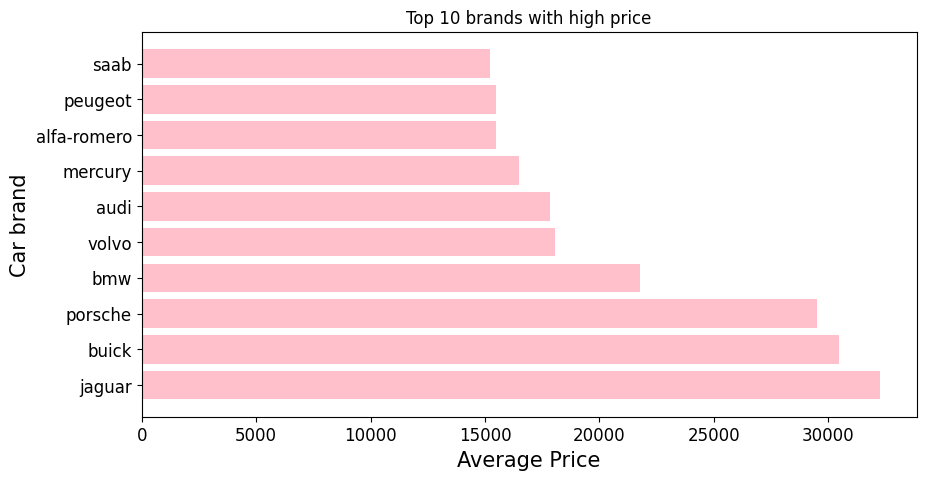

In [108]:
avg_car_price = df.groupby('brand_name').price.mean().sort_values(ascending=  False).reset_index().head(10)
avg_car_price

# top_10_brand = pd.DataFrame(avg_car_price).head(10)
## Draw the chart of top 10 brand sales

plt.figure(figsize=(10, 5))
plt.barh(avg_car_price['brand_name'], avg_car_price['price'], color='pink')
plt.xlabel('Average Price', fontsize = 15)
plt.ylabel('Car brand',fontsize = 15)
plt.title('Top 10 brands with high price')
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

CHECK AVERAGE PRICE FOR EACH CAR

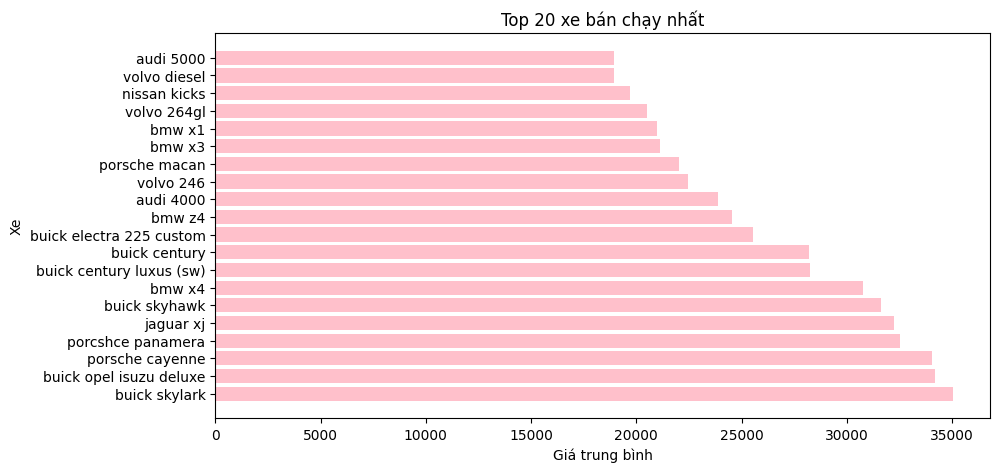

In [109]:
avg_car_price = df.groupby('carname').price.mean().sort_values(ascending= False).reset_index()
avg_car_price

top_20_best_sales = pd.DataFrame(avg_car_price).head(20)
## Draw the chart of top 20 best car sales

plt.figure(figsize=(10, 5))
plt.barh(top_20_best_sales['carname'], top_20_best_sales['price'], color='pink')
plt.xlabel('Giá trung bình')
plt.ylabel('Xe')
plt.title('Top 20 xe bán chạy nhất')
plt.show()

TOP 10 BEST SELLING CAR BRANDS

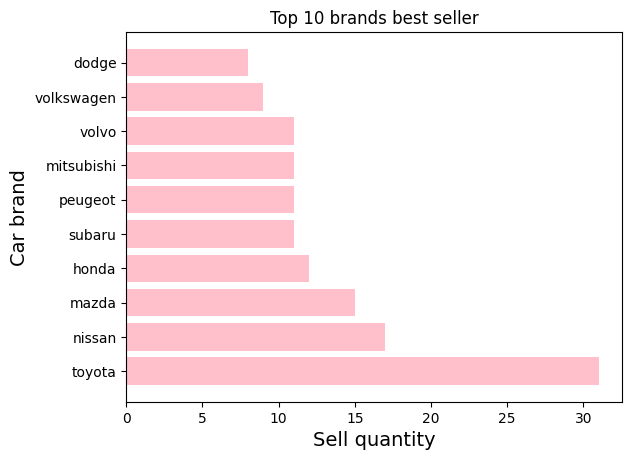

,brand_name,count
0,toyota,31
1,nissan,17
2,mazda,15
3,honda,12
4,subaru,11
5,peugeot,11
6,mitsubishi,11
7,volvo,11
8,volkswagen,9
9,dodge,8


In [110]:
top_car_brand = df['carname'].value_counts().head(10).reset_index()
top_car = pd.DataFrame(df['brand_name'].value_counts().head(10).reset_index())

plt.barh(top_car['brand_name'], top_car['count'], color = 'pink')
plt.xlabel('Sell quantity', fontsize=14)
plt.ylabel('Car brand', fontsize = 14)
plt.title('Top 10 brands best seller')
plt.show()
top_car

DROP COLUMN "CAR NAME", "BRAND NAME"

In [111]:
## Delete "carname" column
df.drop(columns=['carname','brand_name'], inplace=True)
df_cat.drop(columns='carname', inplace=True)
df.drop_duplicates()

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\2214101008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['carname','brand_name'], inplace=True)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,27,13495
1,3,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,27,16500
2,1,gas,std,2,hatchback,rwd,front,945.00,"1,712.00",655.00,524.00,2823,ohcv,6,152,mpfi,268.00,347.00,9.00,154,5000,19,26,16500
3,2,gas,std,4,sedan,fwd,front,998.00,"1,766.00",662.00,543.00,2337,ohc,4,109,mpfi,319.00,34.00,10.00,102,5500,24,30,13950
4,2,gas,std,4,sedan,4wd,front,994.00,"1,766.00",664.00,543.00,2824,ohc,5,136,mpfi,319.00,34.00,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,2952,ohc,4,141,mpfi,378.00,315.00,95.00,114,5400,23,28,16845
201,-1,gas,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",688.00,555.00,3049,ohc,4,141,mpfi,378.00,315.00,87.00,160,5300,19,25,19045
202,-1,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3012,ohcv,6,173,mpfi,358.00,287.00,88.00,134,5500,18,23,21485
203,-1,diesel,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3217,ohc,6,145,idi,301.00,34.00,23.00,106,4800,26,27,22470


In [112]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,27,13495
1,3,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,27,16500
2,1,gas,std,2,hatchback,rwd,front,945.00,"1,712.00",655.00,524.00,2823,ohcv,6,152,mpfi,268.00,347.00,9.00,154,5000,19,26,16500
3,2,gas,std,4,sedan,fwd,front,998.00,"1,766.00",662.00,543.00,2337,ohc,4,109,mpfi,319.00,34.00,10.00,102,5500,24,30,13950
4,2,gas,std,4,sedan,4wd,front,994.00,"1,766.00",664.00,543.00,2824,ohc,5,136,mpfi,319.00,34.00,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,2952,ohc,4,141,mpfi,378.00,315.00,95.00,114,5400,23,28,16845
201,-1,gas,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",688.00,555.00,3049,ohc,4,141,mpfi,378.00,315.00,87.00,160,5300,19,25,19045
202,-1,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3012,ohcv,6,173,mpfi,358.00,287.00,88.00,134,5500,18,23,21485
203,-1,diesel,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3217,ohc,6,145,idi,301.00,34.00,23.00,106,4800,26,27,22470


CHECK CORRELATION

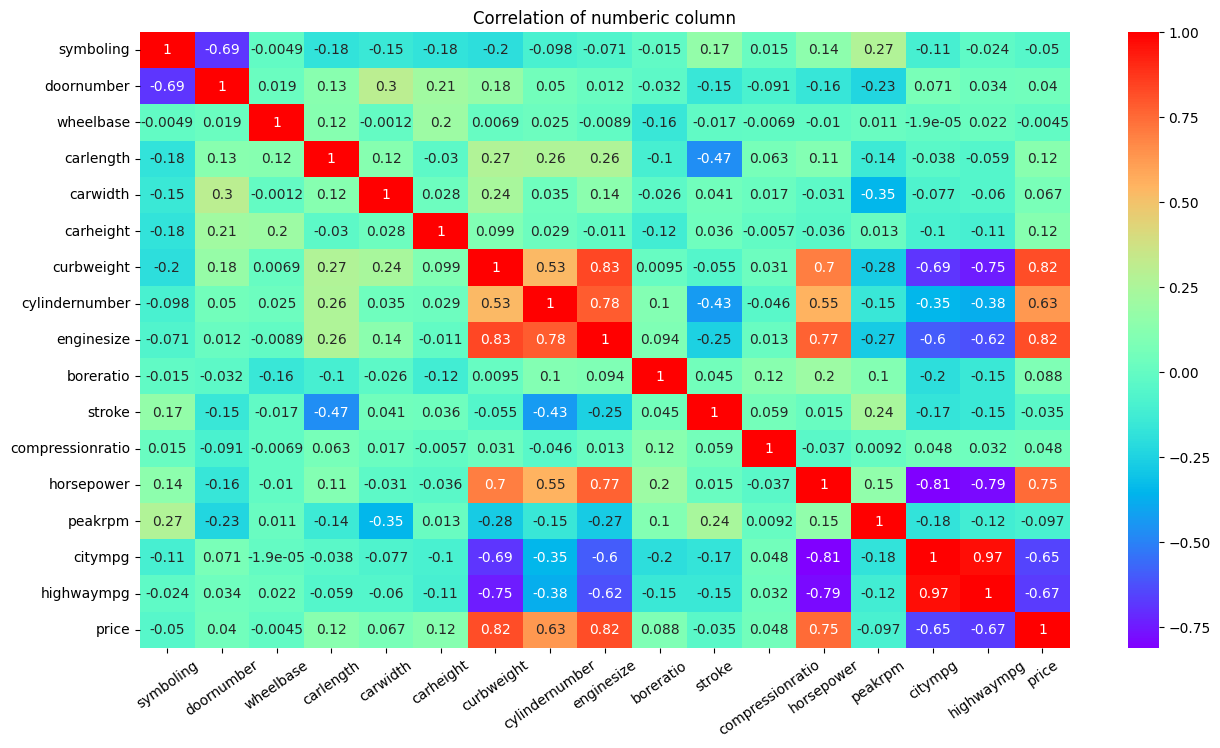

In [113]:
plt.figure(figsize= (15,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot = True, cbar= True, cmap = 'rainbow')
plt.xticks(rotation = 35)
plt.title('Correlation of numberic column')
plt.show()

# DEFINITION: 
symboling: Ký hiệu

wheelbase: Chiều dài cơ sở

carlength: Chiều dài xe

carwidth: Chiều rộng xe

carheight: Chiều cao xe

curbweight: Trọng lượng không tải

enginesize: Dung tích động cơ

boreratio: Tỷ lệ đường kính xi lanh

stroke: Hành trình piston

compressionratio: Tỷ số nén

horsepower: Công suất (mã lực)

peakrpm: Vòng tua tối đa

citympg: Mức tiêu hao nhiên liệu trong thành phố (dặm trên gallon)

Highway MPG" là viết tắt của "Highway Miles Per Gallon," có nghĩa là số dặm mà một chiếc xe có thể đi được trên một gallon nhiên liệu khi lái trên đường cao tốc.

=>  Các xe có chỉ số "city MPG" và "highway MPG" cao (tức là xe tiết kiệm nhiên liệu)

In [114]:
df.columns
# ''symboling', 'CarName', 'fueltype', 'aspiration',
# 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 
# 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
# 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
# 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price'

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [115]:
df_cat

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi
201,gas,turbo,sedan,rwd,front,ohc,mpfi
202,gas,std,sedan,rwd,front,ohcv,mpfi
203,diesel,turbo,sedan,rwd,front,ohc,idi


CHECK CATEGORIES

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1834090105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_cat, palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1834090105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_cat, palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1834090105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_cat, palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1834090105.py:5: Fut

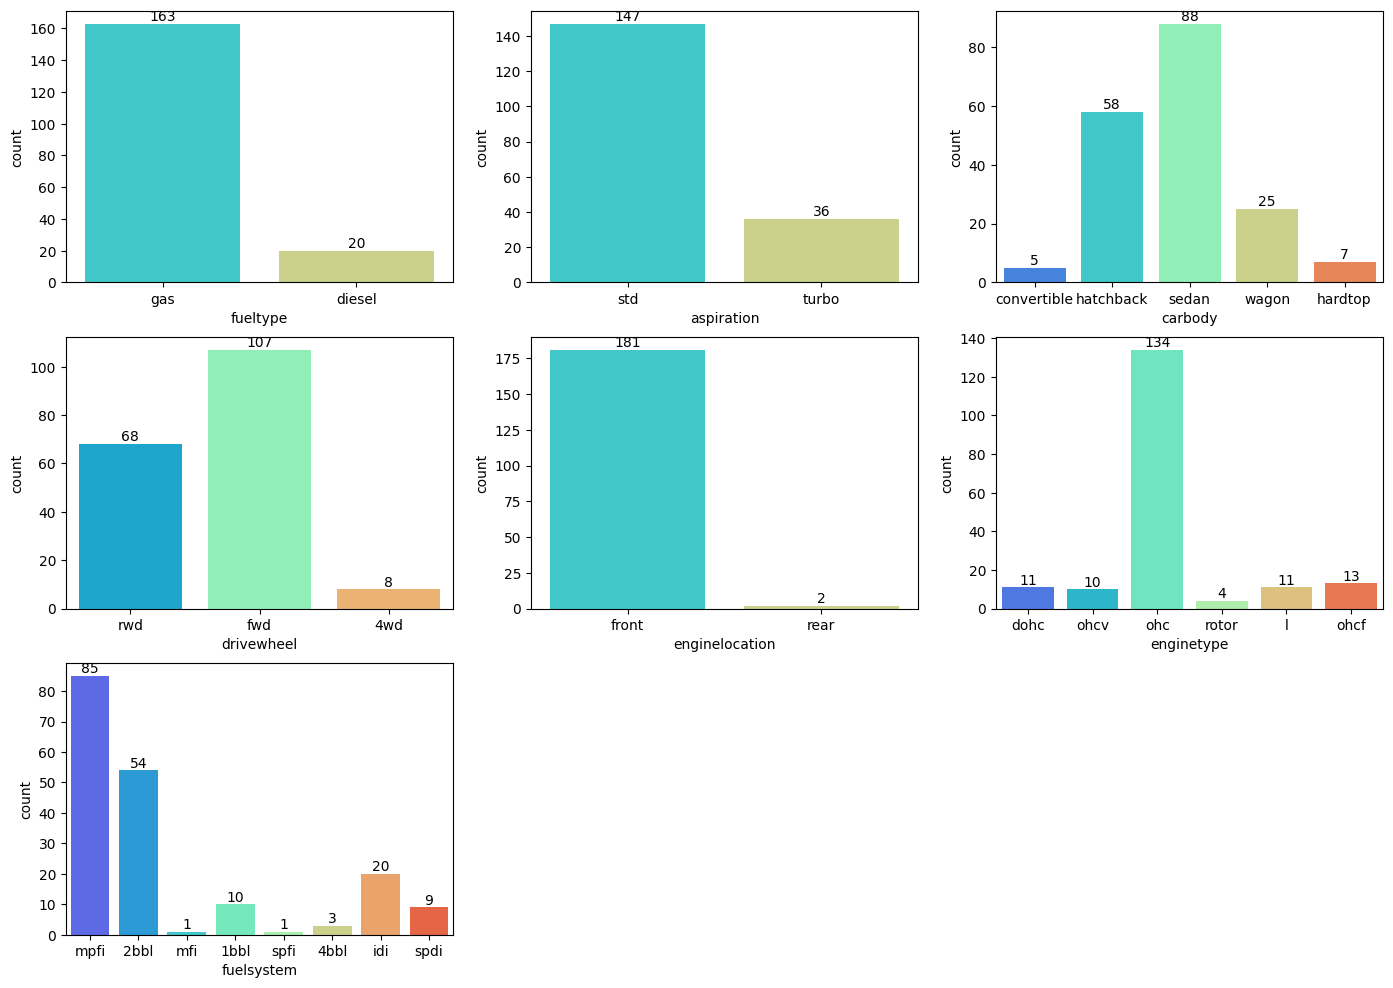

In [116]:
plt.figure(figsize=(17, 12))

for i, col in enumerate(df_cat.columns):
    plt.subplot(3, 3, i + 1)  # Adjust index for subplot (starts from 1)
    ax = sns.countplot(x=col, data=df_cat, palette='rainbow')
    for container in ax.containers:
        ax.bar_label(container)
plt.show()

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\2615081611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\2615081611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\2615081611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\26

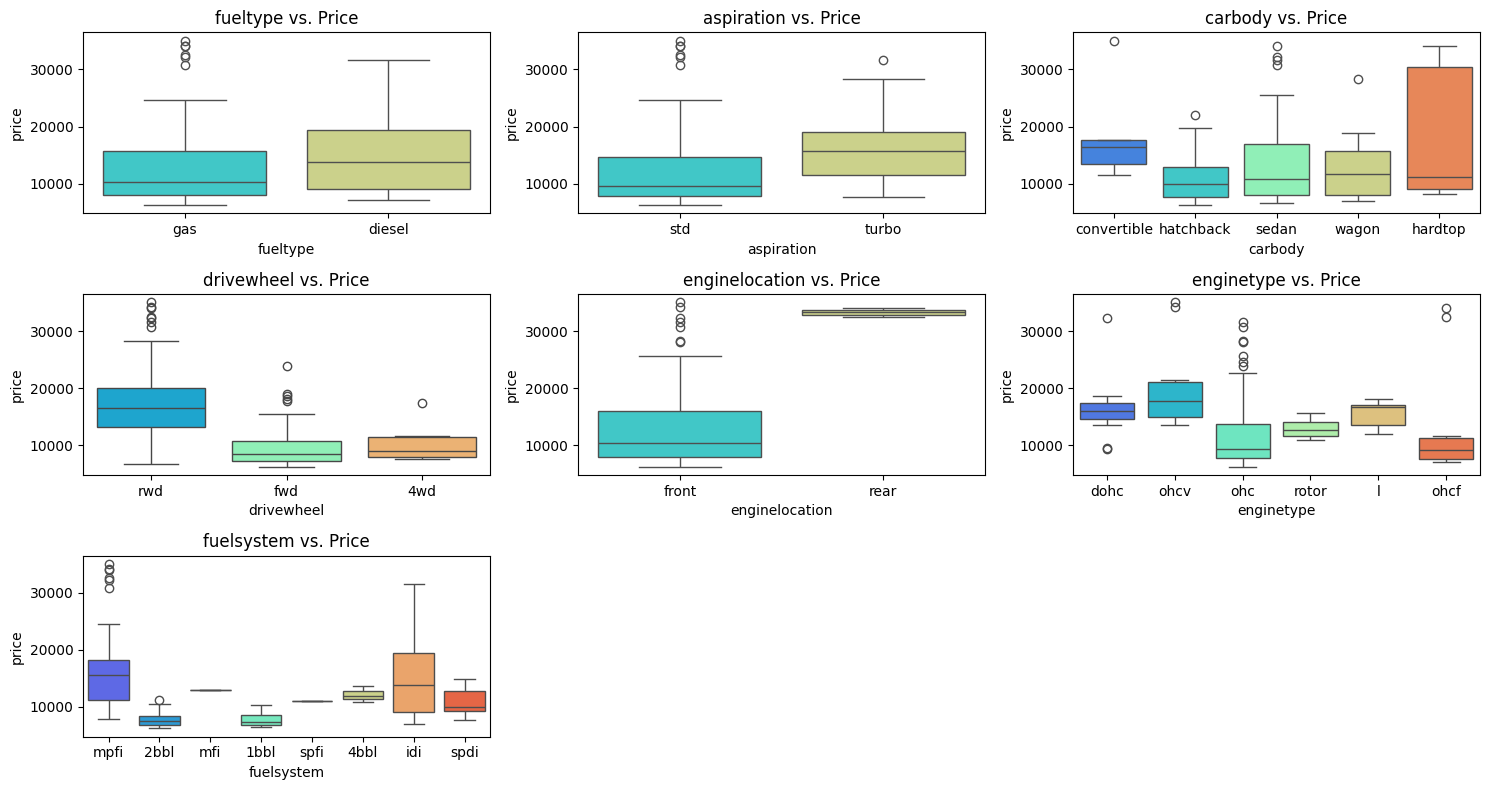

In [117]:
plt.figure(figsize= (15,8))
for i, col in enumerate(df_cat): 
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
    plt.title(f'{col} vs. Price')
plt.tight_layout()
plt.show()

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1026150147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1026150147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\1026150147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\10

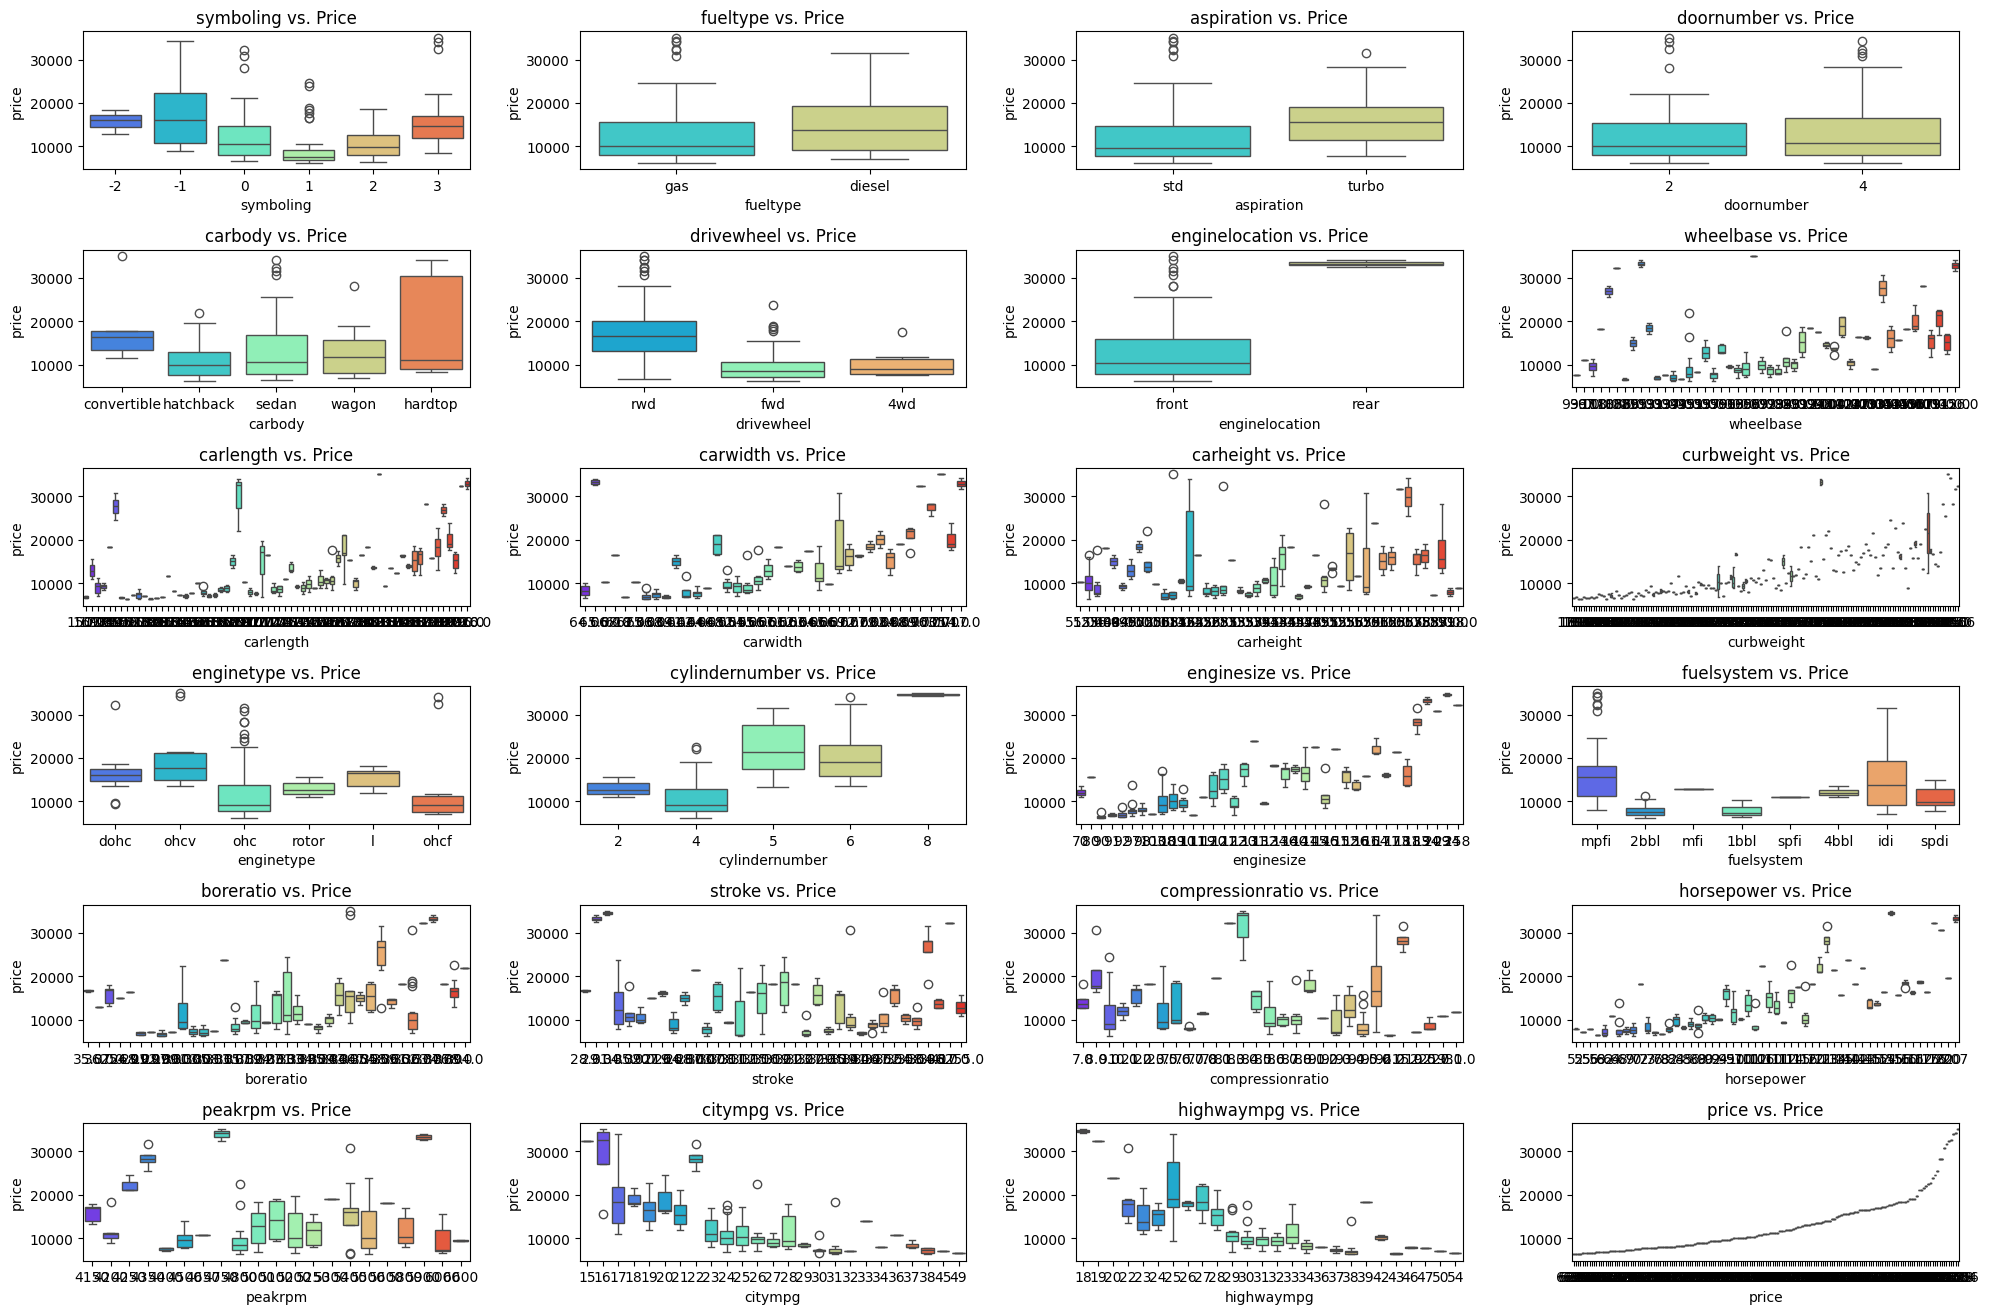

In [118]:
plt.figure(figsize= (20,15))
for i, col in enumerate(df): 
    plt.subplot(7,4,i+1)
    sns.boxplot(data = df, x = col, y = 'price', palette='rainbow')
    plt.title(f'{col} vs. Price')
plt.tight_layout()
plt.show()

# Fuel type (Kiểu nhên liệu): 
	Gas nhiều hơn Diesel
# Aspiration: 
Bản (std) tiêu chuẩn nhiều hơn bản turbo 
# Doornumber (sổ cửa): 
	Xe 4 cửa bán nhiều hơn xe 2 cửa
# Carbody: 
Convertible: Xe mui trần có thể mở hoặc đóng mui. (5)

Hatchback: Xe có cửa sau mở lên, nối liền với khoang hành lý và khoang hành khách. (2)

Sedan: Xe 4 cửa với khoang hành lý riêng biệt. (1)

Wagon: Xe kéo dài phần đuôi với không gian chứa hành lý lớn, thường có 5 cửa. (3)

Hardtop: Xe không có cột B, tạo ra không gian mở rộng khi các cửa sổ được hạ xuống. (4)
# Drivewheel (hệ dẫn động): 
RWD (Rear-Wheel Drive): Dẫn động cầu sau, thường gặp ở xe thể thao và xe sang. (2)

FWD (Front-Wheel Drive): Dẫn động cầu trước, phổ biến ở nhiều loại xe du lịch thông thường. (1)

4WD (Four-Wheel Drive) hoặc AWD (All-Wheel Drive): Dẫn động bốn bánh, cung cấp lực kéo tốt nhất cho các điều kiện off-road và thời tiết khó khăn. (3)
# Engine location: 
	Front nhiều hơn rear
# Engine type: 
DOHC (Double Overhead Camshaft): Đây là một kiểu động cơ với hai trục cam (camshaft) trên đầu, mỗi trục điều khiển các van trên đầu xi lanh.

OHCV (Overhead Valve, Camshaft, và Valve): Một kiểu động cơ với van nằm trên đầu xi lanh được điều khiển bằng trục cam nằm ở dưới đầu động cơ.

OHC (Overhead Camshaft): Đây là một kiểu động cơ có trục cam nằm ở phía trên đầu động cơ, điều khiển các van trên đầu xi lanh. (1) 

L: Thường được sử dụng để chỉ một loại động cơ không có trục cam nằm ở phía trên.

Rotor: Thường được sử dụng cho các động cơ kiểu rotary, như trong các xe Mazda RX-series. Các động cơ này sử dụng cánh quạt xoay (rotor) thay vì xi lanh truyền thống.

OHCF (Overhead Camshaft with a Flathead): Một kiểu động cơ có trục cam nằm ở phía trên đầu động cơ, nhưng có một đầu phẳng. (2)

DOHCV (Double Overhead Camshaft with Variable Valve Timing): Tương tự như DOHC, nhưng có thêm chức năng điều chỉnh thời gian mở/đóng của van để tối ưu hóa hiệu suất động cơ.

# Cylinder Number (Số lượng xi lanh): 
Động cơ có 4 xi lăng -> 6 xi lăng -> 5 xi lăng -> 8 xi lăng -> 2 xi lăng
# Fuel System: 
MPFI (Multi-Point Fuel Injection): Hệ thống phun nhiên liệu đa điểm, nơi mỗi xi lanh có một vòi phun nhiên liệu riêng. Điều này giúp cung cấp nhiên liệu chính xác hơn và tăng hiệu suất đốt cháy. (1) 

2BBL (Two-Barrel Carburetor): Một bộ chế hòa khí (carburetor) có hai họng (barrel). Bộ chế hòa khí là một thiết bị trộn không khí và nhiên liệu cho động cơ đốt trong. (2)

MFI (Mechanical Fuel Injection): Hệ thống phun nhiên liệu cơ khí, không sử dụng các cảm biến điện tử như trong hệ thống phun nhiên liệu hiện đại. (7)

1BBL (One-Barrel Carburetor): Một bộ chế hòa khí có một họng. Thường thấy trong các động cơ nhỏ hơn hoặc cũ hơn. (5)

SPFI (Single-Point Fuel Injection): Hệ thống phun nhiên liệu một điểm, còn được gọi là hệ thống phun nhiên liệu thân bướm ga, nơi một vòi phun duy nhất cung cấp nhiên liệu cho tất cả các xi lanh thông qua một điểm duy nhất. (7)

4BBL (Four-Barrel Carburetor): Một bộ chế hòa khí có bốn họng, thường được sử dụng trong các động cơ hiệu suất cao để cung cấp lượng nhiên liệu lớn hơn. (6)

IDI (Indirect Injection): Hệ thống phun nhiên liệu gián tiếp, trong đó nhiên liệu được phun vào buồng đốt phụ (prechamber) trước khi vào buồng đốt chính. Thường thấy trong động cơ diesel cũ. (3)

SPDI (Single-Point Direct Injection): Hệ thống phun nhiên liệu trực tiếp một điểm, nơi nhiên liệu được phun trực tiếp vào buồng đốt của mỗi xi lanh, giúp tối ưu hóa hiệu suất đốt cháy và tiết kiệm nhiên liệu. (4)


# Fueltype vs. Price:

Diesel cars have a higher median price compared to gas cars.

Diesel cars also show less variability in price compared to gas cars.

# Aspiration vs. Price:

Turbocharged cars have a higher median price compared to standard (naturally aspirated) cars.

There is greater variability in the price of turbocharged cars compared to standard cars.

# Carbody vs. Price:

Hardtop cars have the highest median price, followed by convertibles.

Hatchback, sedan, and wagon cars have lower median prices, with wagons showing the least variability.
# Drivewheel vs. Price:

Rear-wheel-drive (RWD) cars have the highest median price, followed by four-wheel-drive (4WD) cars.

Front-wheel-drive (FWD) cars have the lowest median price and show less variability compared to RWD and 4WD cars.
# Enginelocation vs. Price:

Cars with rear engine locations have significantly higher prices compared to those with front engine locations.

Rear-engine cars show minimal variability in price, whereas front-engine cars show substantial variability.
# Enginetype vs. Price:

DOHC and OHCV engine types have higher median prices compared to other engine types.

OHCF engine types have the lowest median price.

There is considerable variability in prices for all engine types, with OHCV showing the most variability.

# Fuelsystem vs. Price:

Cars with 'mpfi' (multi-point fuel injection) fuel systems have the highest median price, followed by 'spdi' and 'idi' systems.

'2bbl' and '1bbl' systems have the lowest median prices and show less variability.

There is significant variability in prices across different fuel systems, with 'mpfi' showing the most variability.

# CHECK NUMBERIC 

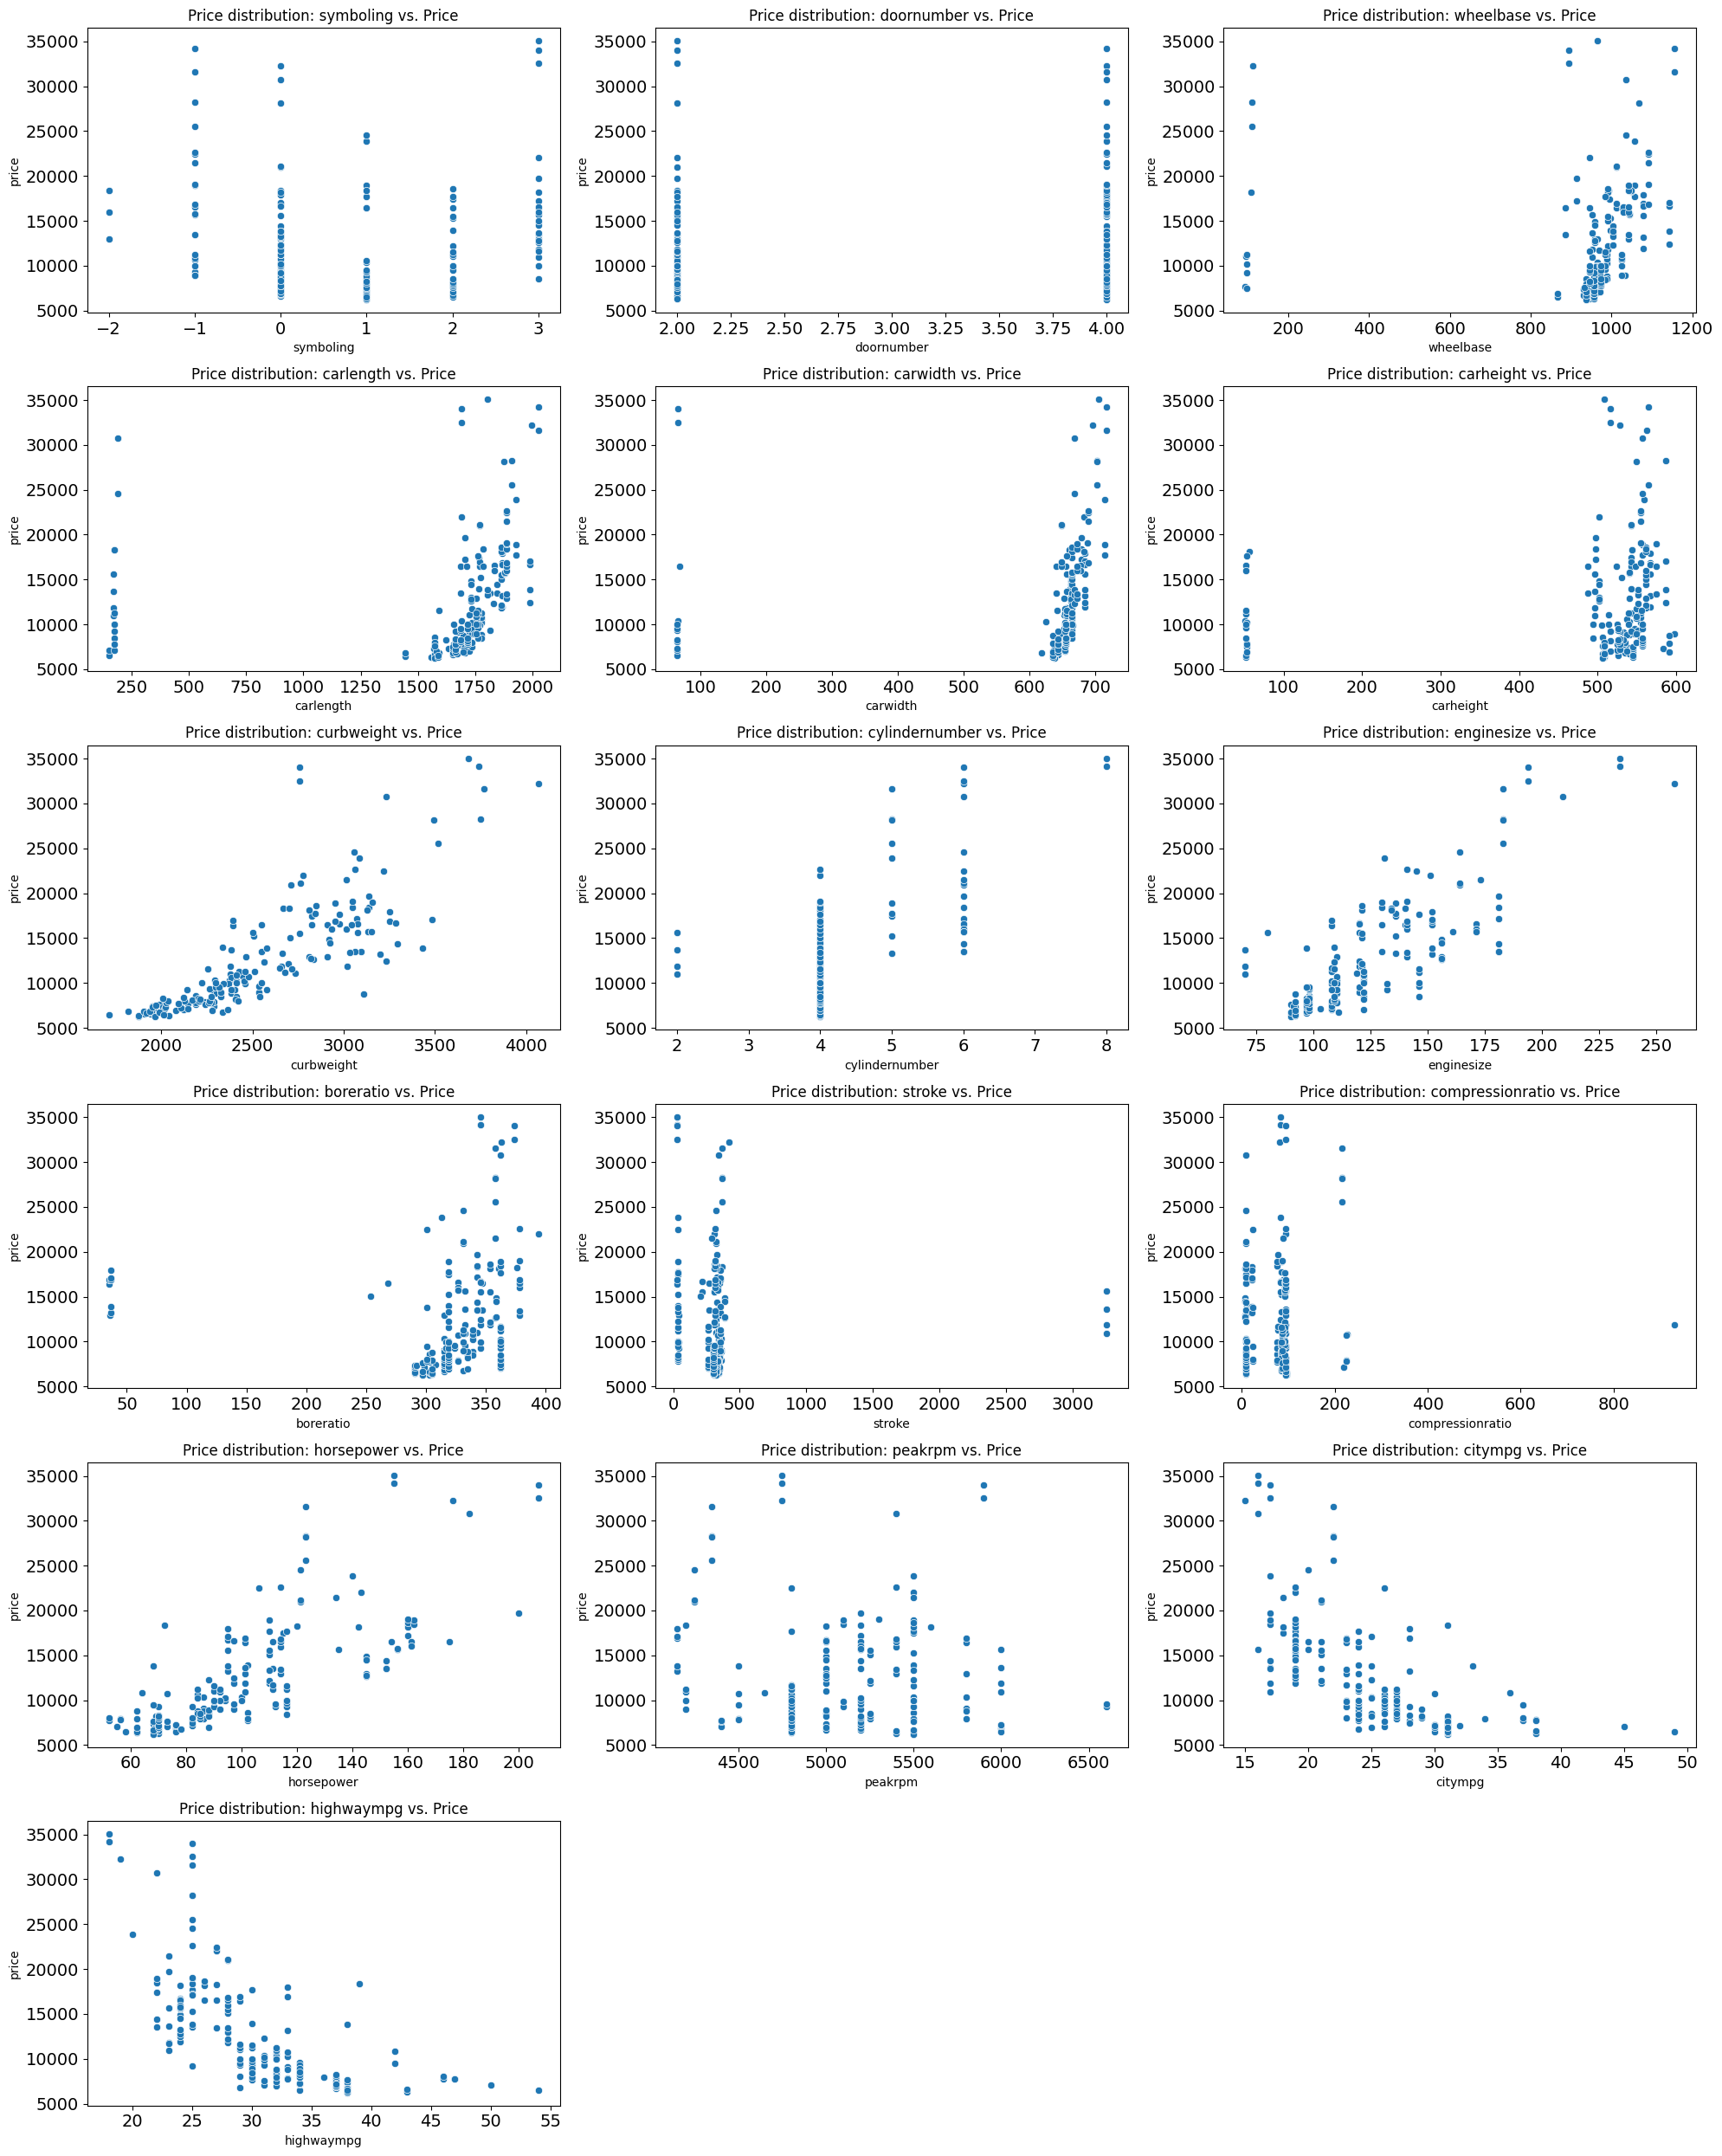

In [119]:
# Kết hợp các cột số học với cột 'carname'

plt.figure(figsize=(20, 25))
for i, col in enumerate(df_num.drop(columns=['price']).columns):
    plt.subplot(6, 3, i+1)
    sns.scatterplot(data=df_num, x=col, y='price')
    plt.title(f'Price distribution: {col} vs. Price')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [120]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,27,13495
1,3,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,27,16500
2,1,gas,std,2,hatchback,rwd,front,945.00,"1,712.00",655.00,524.00,2823,ohcv,6,152,mpfi,268.00,347.00,9.00,154,5000,19,26,16500
3,2,gas,std,4,sedan,fwd,front,998.00,"1,766.00",662.00,543.00,2337,ohc,4,109,mpfi,319.00,34.00,10.00,102,5500,24,30,13950
4,2,gas,std,4,sedan,4wd,front,994.00,"1,766.00",664.00,543.00,2824,ohc,5,136,mpfi,319.00,34.00,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,2952,ohc,4,141,mpfi,378.00,315.00,95.00,114,5400,23,28,16845
201,-1,gas,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",688.00,555.00,3049,ohc,4,141,mpfi,378.00,315.00,87.00,160,5300,19,25,19045
202,-1,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3012,ohcv,6,173,mpfi,358.00,287.00,88.00,134,5500,18,23,21485
203,-1,diesel,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3217,ohc,6,145,idi,301.00,34.00,23.00,106,4800,26,27,22470


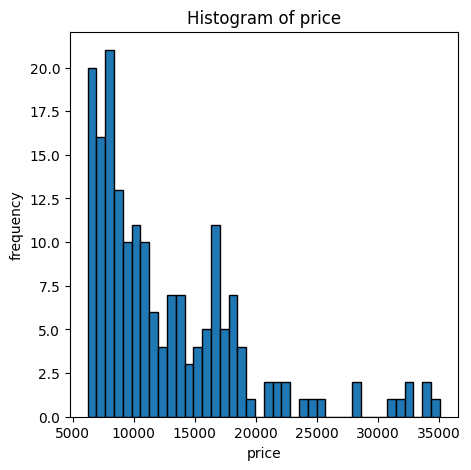

In [121]:
plt.figure(figsize=(5,5))
plt.hist(df['price'],bins=40, edgecolor = 'k')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of price')
plt.show()

In [122]:
print(df_num.describe())
# OUTPUT: 
# Xóa cột symboling -> Không mang ý nghĩa phân tích
df.drop(columns=['symboling','highwaympg'],inplace= True)

       symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
count     183.00      183.00     183.00     183.00    183.00     183.00   
mean        0.82        3.21     937.93   1,602.06    620.64     494.49   
std         1.29        0.98     208.68     471.56    148.87     143.84   
min        -2.00        2.00      93.00     150.00     64.00      51.00   
25%         0.00        2.00     945.00   1,656.50    640.00     508.00   
50%         1.00        4.00     965.00   1,732.00    655.00     541.00   
75%         2.00        4.00   1,012.00   1,809.00    665.00     556.50   
max         3.00        4.00   1,156.00   2,026.00    717.00     598.00   

       curbweight  cylindernumber  enginesize  boreratio   stroke  \
count      183.00          183.00      183.00     183.00   183.00   
mean     2,555.62            4.27      124.16     319.10   333.93   
std        464.67            0.83       32.10      65.57   453.06   
min      1,713.00            2.00       70.00   

C:\Users\baoch\AppData\Local\Temp\ipykernel_17856\800285000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['symboling','highwaympg'],inplace= True)


In [123]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,13495
1,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,16500
2,gas,std,2,hatchback,rwd,front,945.00,"1,712.00",655.00,524.00,2823,ohcv,6,152,mpfi,268.00,347.00,9.00,154,5000,19,16500
3,gas,std,4,sedan,fwd,front,998.00,"1,766.00",662.00,543.00,2337,ohc,4,109,mpfi,319.00,34.00,10.00,102,5500,24,13950
4,gas,std,4,sedan,4wd,front,994.00,"1,766.00",664.00,543.00,2824,ohc,5,136,mpfi,319.00,34.00,8.00,115,5500,18,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,2952,ohc,4,141,mpfi,378.00,315.00,95.00,114,5400,23,16845
201,gas,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",688.00,555.00,3049,ohc,4,141,mpfi,378.00,315.00,87.00,160,5300,19,19045
202,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3012,ohcv,6,173,mpfi,358.00,287.00,88.00,134,5500,18,21485
203,diesel,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3217,ohc,6,145,idi,301.00,34.00,23.00,106,4800,26,22470


# PREPROCESSING DATA 

CHECK DUPLICATE 

In [124]:
 # Không có duplicate
df.duplicated().sum()

1

ENCODING

*** Chuyển data từ chữ ('Object') sang số

In [125]:
df_cat.describe()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
count,183,183,183,183,183,183,183
unique,2,2,5,3,2,6,8
top,gas,std,sedan,fwd,front,ohc,mpfi
freq,163,147,88,107,181,134,85


In [126]:
for i in df_cat.columns: 
    print(f'Cột {i} có các phần tử là {df[i].unique()}')

Cột fueltype có các phần tử là ['gas' 'diesel']
Cột aspiration có các phần tử là ['std' 'turbo']
Cột carbody có các phần tử là ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Cột drivewheel có các phần tử là ['rwd' 'fwd' '4wd']
Cột enginelocation có các phần tử là ['front' 'rear']
Cột enginetype có các phần tử là ['dohc' 'ohcv' 'ohc' 'rotor' 'l' 'ohcf']
Cột fuelsystem có các phần tử là ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [140]:
df_copy = df.copy()
df_copy

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,13495
1,gas,std,2,convertible,rwd,front,886.00,"1,688.00",641.00,488.00,2548,dohc,4,130,mpfi,347.00,268.00,9.00,111,5000,21,16500
2,gas,std,2,hatchback,rwd,front,945.00,"1,712.00",655.00,524.00,2823,ohcv,6,152,mpfi,268.00,347.00,9.00,154,5000,19,16500
3,gas,std,4,sedan,fwd,front,998.00,"1,766.00",662.00,543.00,2337,ohc,4,109,mpfi,319.00,34.00,10.00,102,5500,24,13950
4,gas,std,4,sedan,4wd,front,994.00,"1,766.00",664.00,543.00,2824,ohc,5,136,mpfi,319.00,34.00,8.00,115,5500,18,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,2952,ohc,4,141,mpfi,378.00,315.00,95.00,114,5400,23,16845
201,gas,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",688.00,555.00,3049,ohc,4,141,mpfi,378.00,315.00,87.00,160,5300,19,19045
202,gas,std,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3012,ohcv,6,173,mpfi,358.00,287.00,88.00,134,5500,18,21485
203,diesel,turbo,4,sedan,rwd,front,"1,091.00","1,888.00",689.00,555.00,3217,ohc,6,145,idi,301.00,34.00,23.00,106,4800,26,22470


In [141]:
# ## One hot encoding 
df_copy = pd.get_dummies (df_copy, drop_first=True, dtype= int)

STANDARD SCALER 

In [129]:
df_num

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,886.00,"1,688.00",641.00,488.00,2548,4,130,347.00,268.00,9.00,111,5000,21,27,13495
1,3,2,886.00,"1,688.00",641.00,488.00,2548,4,130,347.00,268.00,9.00,111,5000,21,27,16500
2,1,2,945.00,"1,712.00",655.00,524.00,2823,6,152,268.00,347.00,9.00,154,5000,19,26,16500
3,2,4,998.00,"1,766.00",662.00,543.00,2337,4,109,319.00,34.00,10.00,102,5500,24,30,13950
4,2,4,994.00,"1,766.00",664.00,543.00,2824,5,136,319.00,34.00,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,"1,091.00","1,888.00",689.00,555.00,2952,4,141,378.00,315.00,95.00,114,5400,23,28,16845
201,-1,4,"1,091.00","1,888.00",688.00,555.00,3049,4,141,378.00,315.00,87.00,160,5300,19,25,19045
202,-1,4,"1,091.00","1,888.00",689.00,555.00,3012,6,173,358.00,287.00,88.00,134,5500,18,23,21485
203,-1,4,"1,091.00","1,888.00",689.00,555.00,3217,6,145,301.00,34.00,23.00,106,4800,26,27,22470


In [130]:
df_num.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [142]:
ss = StandardScaler()
df_copy[['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg',
       'cylindernumber','doornumber']] = ss.fit_transform(df_copy[['wheelbase', 
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
       'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm',
       'citympg','cylindernumber','doornumber']])

In [132]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 204
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   doornumber           183 non-null    float64
 1   wheelbase            183 non-null    float64
 2   carlength            183 non-null    float64
 3   carwidth             183 non-null    float64
 4   carheight            183 non-null    float64
 5   curbweight           183 non-null    float64
 6   cylindernumber       183 non-null    float64
 7   enginesize           183 non-null    float64
 8   boreratio            183 non-null    float64
 9   stroke               183 non-null    float64
 10  compressionratio     183 non-null    float64
 11  horsepower           183 non-null    float64
 12  peakrpm              183 non-null    float64
 13  citympg              183 non-null    float64
 14  price                183 non-null    int64  
 15  fueltype_gas         183 non-null    int32  


# LINEAR REGRESSION

In [143]:
X = df_copy.drop(columns='price')
y = df_copy['price']

NO USE LOG1P

In [144]:
accuracy = []
for i in range(30, 50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    accuracy.append({'Random_state': i, 'r2_score_1': r2, 'mse_1': mse})

df_accuracy = pd.DataFrame(accuracy)
df_accuracy

,Random_state,r2_score_1,mse_1
0,30,0.44,"10,574,715.97"
1,31,0.78,"5,039,248.09"
2,32,0.81,"11,586,753.85"
3,33,0.82,"6,290,576.79"
4,34,0.87,"5,218,464.99"
5,35,0.84,"5,823,825.37"
6,36,0.91,"4,944,673.13"
7,37,0.86,"6,618,558.65"
8,38,0.85,"6,910,822.87"
9,39,0.72,"12,117,144.17"


In [145]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
185,8195,"9,329.83","-1,134.83"
7,18920,"17,616.57","1,303.43"
166,9538,"8,911.26",626.74
106,18399,"20,843.70","-2,444.70"
201,19045,"20,375.08","-1,330.08"
114,17075,"18,386.36","-1,311.36"
84,14489,"13,547.06",941.94
136,18150,"12,938.06","5,211.94"
26,7609,"7,603.49",5.51
123,8921,"10,410.66","-1,489.66"


USE LOG1P

In [146]:
df_copy['price'] = np.log1p(df_copy['price'])

In [147]:
X = df_copy.drop(columns='price')
y = df_copy['price']

In [148]:
accuracy_log = []
for i in range(30,50):
    X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred_exp = np.exp(y_pred)
    mse = mean_squared_error(np.exp(y_test), y_pred_exp)
    r2 = r2_score(np.exp(y_test), y_pred_exp)
    accuracy_log.append({'Random_state': i,
                            'r2_score_2': r2,
                            'MSE_2' : mse
                            })
df_accuracy_log = pd.DataFrame(accuracy_log)
df_accuracy_log



,Random_state,r2_score_2,MSE_2
0,30,0.58,"7,876,825.03"
1,31,0.81,"4,375,308.68"
2,32,0.83,"10,519,133.60"
3,33,0.80,"7,099,557.97"
4,34,0.91,"3,356,441.75"
5,35,0.91,"3,196,322.38"
6,36,0.92,"4,377,099.52"
7,37,0.90,"4,731,457.80"
8,38,0.91,"4,227,662.24"
9,39,0.69,"13,312,004.83"


In [149]:
df_accuracy_full = pd.merge(df_accuracy,df_accuracy_log, on = 'Random_state', how= 'right' )
df_accuracy_full

,Random_state,r2_score_1,mse_1,r2_score_2,MSE_2
0,30,0.44,"10,574,715.97",0.58,"7,876,825.03"
1,31,0.78,"5,039,248.09",0.81,"4,375,308.68"
2,32,0.81,"11,586,753.85",0.83,"10,519,133.60"
3,33,0.82,"6,290,576.79",0.80,"7,099,557.97"
4,34,0.87,"5,218,464.99",0.91,"3,356,441.75"
5,35,0.84,"5,823,825.37",0.91,"3,196,322.38"
6,36,0.91,"4,944,673.13",0.92,"4,377,099.52"
7,37,0.86,"6,618,558.65",0.90,"4,731,457.80"
8,38,0.85,"6,910,822.87",0.91,"4,227,662.24"
9,39,0.72,"12,117,144.17",0.69,"13,312,004.83"
